In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import resnet_v2
import cv2
import tensorflow as tf
import os
import random

# Loading the Dataset

In [ ]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data,dtype=object)

In [ ]:
data_dir = "/kaggle/input/flowers-recognition/flowers"
data = get_data(data_dir)

# Data Preprocessing

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [ ]:
# Normalize the data
x = np.array(x) / 255

# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , stratify = y ,shuffle=True, random_state = 0)

In [ ]:
del x,y,data

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


# Training The Model

In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights= None)
    
    model_0_batch32 = Sequential([
        base_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model_0_batch32.compile(optimizer = "ADAM" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_0_batch32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 23,611,525
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights= None)
    
    model_0_batch64 = Sequential([
        base_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model_0_batch64.compile(optimizer = "ADAM" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_0_batch64.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 23,611,525
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights= None)
    
    model_0_batch128 = Sequential([
        base_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model_0_batch128.compile(optimizer = "ADAM" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_0_batch128.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 23,611,525
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights=None)
    
    model_1 = Sequential([
        base_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])
    model_1.compile(optimizer = "SGD" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 23,611,525
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    base_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights=None)
    
    model_2 = Sequential([
        base_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dropout(0.5),
        Dense(5 , activation='softmax')])
    model_2.compile(optimizer = "ADAM" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dropout (Dropout)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 23,611,525
Non-trainable params: 45,440
_______________________________________

In [ ]:
tf.keras.backend.clear_session()

with strategy.scope(): 
    pre_trained_model = resnet_v2.ResNet50V2(input_shape=(224,224,3), include_top=False, weights="imagenet")
    
    for layer in pre_trained_model.layers[:150]:
        layer.trainable = False
        
    model_3 = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dropout(0.5),
        Dense(5 , activation='softmax')])
    model_3.compile(optimizer = "ADAM" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dropout (Dropout)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 5)                 92165     
                                                                 
Total params: 23,656,965
Trainable params: 15,326,213
Non-trainable params: 8,330,752
____________________________________

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.6, min_lr=0.000001)

In [ ]:
history_0_batch32 = model_0_batch32.fit(x_train,y_train, batch_size = 32 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
108/108 [==============================] - 66s 149ms/step - loss: 2.8860 - accuracy: 0.3073 - val_loss: 2.2115 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 2/40
108/108 [==============================] - 5s 49ms/step - loss: 1.4094 - accuracy: 0.4535 - val_loss: 2.6775 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 3/40
108/108 [==============================] - 5s 50ms/step - loss: 1.2645 - accuracy: 0.5013 - val_loss: 1.3533 - val_accuracy: 0.4549 - lr: 0.0010
Epoch 4/40
108/108 [==============================] - 5s 50ms/step - loss: 1.0881 - accuracy: 0.5850 - val_loss: 1.1347 - val_accuracy: 0.5116 - lr: 0.0010
Epoch 5/40
108/108 [==============================] - 5s 49ms/step - loss: 0.9845 - accuracy: 0.6142 - val_loss: 1.0905 - val_accuracy: 0.5405 - lr: 0.0010
Epoch 6/40
108/108 [==============================] - 5s 49ms/step - loss: 0.9535 - accuracy: 0.6345 - val_loss: 1.0398 - val_accuracy: 0.6076 - lr: 0.0010
Epoch 7/40
108/108 [==============================] - 5s 49ms/

In [ ]:
history_0_batch64 = model_0_batch64.fit(x_train,y_train, batch_size = 64 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
54/54 [==============================] - 70s 386ms/step - loss: 3.5641 - accuracy: 0.3136 - val_loss: 22.1735 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 2/40
54/54 [==============================] - 4s 72ms/step - loss: 1.6739 - accuracy: 0.4596 - val_loss: 2.3129 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 3/40
54/54 [==============================] - ETA: 0s - loss: 1.2968 - accuracy: 0.5054
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
54/54 [==============================] - 4s 71ms/step - loss: 1.2968 - accuracy: 0.5054 - val_loss: 2.0491 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 4/40
54/54 [==============================] - 4s 71ms/step - loss: 1.0709 - accuracy: 0.5798 - val_loss: 1.8782 - val_accuracy: 0.2442 - lr: 6.0000e-04
Epoch 5/40
54/54 [==============================] - 4s 70ms/step - loss: 0.9909 - accuracy: 0.6224 - val_loss: 1.7731 - val_accuracy: 0.2662 - lr: 6.0000e-04
Epoch 6/40
54/54 [==============================] - 4s 7

In [ ]:
history_0_batch128 = model_0_batch128.fit(x_train,y_train, batch_size = 128 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
27/27 [==============================] - 74s 731ms/step - loss: 4.3334 - accuracy: 0.2456 - val_loss: 1105.6714 - val_accuracy: 0.2326 - lr: 0.0010
Epoch 2/40
27/27 [==============================] - 3s 109ms/step - loss: 1.8103 - accuracy: 0.3475 - val_loss: 1.6615 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 3/40
27/27 [==============================] - 3s 105ms/step - loss: 1.4005 - accuracy: 0.4848 - val_loss: 1.8971 - val_accuracy: 0.2419 - lr: 0.0010
Epoch 4/40
27/27 [==============================] - ETA: 0s - loss: 1.1749 - accuracy: 0.5546
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
27/27 [==============================] - 3s 105ms/step - loss: 1.1749 - accuracy: 0.5546 - val_loss: 2.0142 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 5/40
27/27 [==============================] - 3s 105ms/step - loss: 1.0137 - accuracy: 0.6131 - val_loss: 2.1834 - val_accuracy: 0.2431 - lr: 6.0000e-04
Epoch 6/40
27/27 [==============================] - ET

In [ ]:
history_1 = model_1.fit(x_train,y_train, batch_size = 32 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
108/108 [==============================] - 27s 46ms/step - loss: 6.2328 - accuracy: 0.2436 - val_loss: 3.8479 - val_accuracy: 0.2986 - lr: 0.0100
Epoch 2/40
108/108 [==============================] - 5s 45ms/step - loss: 2.1648 - accuracy: 0.3440 - val_loss: 1.3833 - val_accuracy: 0.4363 - lr: 0.0100
Epoch 3/40
108/108 [==============================] - 5s 45ms/step - loss: 1.4918 - accuracy: 0.4141 - val_loss: 1.5537 - val_accuracy: 0.3947 - lr: 0.0100
Epoch 4/40
108/108 [==============================] - 6s 52ms/step - loss: 1.3212 - accuracy: 0.4419 - val_loss: 1.2451 - val_accuracy: 0.4688 - lr: 0.0100
Epoch 5/40
108/108 [==============================] - 6s 54ms/step - loss: 1.2227 - accuracy: 0.5013 - val_loss: 1.2263 - val_accuracy: 0.5046 - lr: 0.0100
Epoch 6/40
108/108 [==============================] - 5s 46ms/step - loss: 1.1830 - accuracy: 0.5227 - val_loss: 1.2894 - val_accuracy: 0.4699 - lr: 0.0100
Epoch 7/40
108/108 [==============================] - 5s 46ms/s

In [ ]:
history_2 = model_2.fit(x_train,y_train, batch_size = 32 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
108/108 [==============================] - 69s 153ms/step - loss: 2.7946 - accuracy: 0.3157 - val_loss: 3.2095 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 2/40
108/108 [==============================] - 5s 51ms/step - loss: 1.5384 - accuracy: 0.4376 - val_loss: 2.9589 - val_accuracy: 0.2431 - lr: 0.0010
Epoch 3/40
108/108 [==============================] - 5s 51ms/step - loss: 1.2402 - accuracy: 0.5181 - val_loss: 1.7287 - val_accuracy: 0.3264 - lr: 0.0010
Epoch 4/40
108/108 [==============================] - 5s 50ms/step - loss: 1.1161 - accuracy: 0.5610 - val_loss: 1.2727 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 5/40
108/108 [==============================] - 5s 50ms/step - loss: 1.0224 - accuracy: 0.6142 - val_loss: 8.2240 - val_accuracy: 0.4537 - lr: 0.0010
Epoch 6/40
108/108 [==============================] - 5s 50ms/step - loss: 0.9761 - accuracy: 0.6334 - val_loss: 1.3907 - val_accuracy: 0.4873 - lr: 0.0010
Epoch 7/40
108/108 [==============================] - 5s 51ms/

In [ ]:
history_3 = model_3.fit(x_train,y_train, batch_size = 32 , epochs = 40 , validation_data = (x_test, y_test),callbacks = [learning_rate_reduction])

Epoch 1/40
108/108 [==============================] - 19s 74ms/step - loss: 1.4924 - accuracy: 0.6145 - val_loss: 0.8541 - val_accuracy: 0.7789 - lr: 0.0010
Epoch 2/40
108/108 [==============================] - 4s 36ms/step - loss: 0.5669 - accuracy: 0.8045 - val_loss: 0.4953 - val_accuracy: 0.8449 - lr: 0.0010
Epoch 3/40
108/108 [==============================] - 4s 36ms/step - loss: 0.4638 - accuracy: 0.8422 - val_loss: 0.6758 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 4/40
107/108 [============================>.] - ETA: 0s - loss: 0.4306 - accuracy: 0.8624
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
108/108 [==============================] - 4s 37ms/step - loss: 0.4283 - accuracy: 0.8630 - val_loss: 0.8263 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 5/40
108/108 [==============================] - 4s 37ms/step - loss: 0.2194 - accuracy: 0.9302 - val_loss: 0.4702 - val_accuracy: 0.8715 - lr: 6.0000e-04
Epoch 6/40
108/108 [==============================

In [ ]:

print("Loss of the model_0_batch32 is - " , model_0_batch32.evaluate(x_test,y_test)[0])
print("Accuracy of the model_0_batch32 is - " , model_0_batch32.evaluate(x_test,y_test)[1]*100 , "%")

print("Loss of the model_0_batch64 is - " , model_0_batch64.evaluate(x_test,y_test)[0])
print("Accuracy of the model_0_batch64 is - " , model_0_batch64.evaluate(x_test,y_test)[1]*100 , "%")

print("Loss of the model_0_batch128 is - " , model_0_batch128.evaluate(x_test,y_test)[0])
print("Accuracy of the model_0_batch128 is - " , model_0_batch128.evaluate(x_test,y_test)[1]*100 , "%")

print("Loss of the model_1 is - " , model_1.evaluate(x_test,y_test)[0])
print("Accuracy of the model_1 is - " , model_1.evaluate(x_test,y_test)[1]*100 , "%")

print("Loss of the model_2 is - " , model_2.evaluate(x_test,y_test)[0])
print("Accuracy of the model_2 is - " , model_2.evaluate(x_test,y_test)[1]*100 , "%")

print("Loss of the model_3 is - " , model_3.evaluate(x_test,y_test)[0])
print("Accuracy of the model_3 is - " , model_3.evaluate(x_test,y_test)[1]*100 , "%")

27/27 [==============================] - 1s 16ms/step - loss: 1.4397 - accuracy: 0.6852
Loss of the model_0_batch32 is -  1.4397356510162354
27/27 [==============================] - 1s 16ms/step - loss: 1.4397 - accuracy: 0.6852
Accuracy of the model_0_batch32 is -  68.5185194015503 %
27/27 [==============================] - 1s 23ms/step - loss: 1.4528 - accuracy: 0.6713
Loss of the model_0_batch64 is -  1.452834963798523
27/27 [==============================] - 1s 23ms/step - loss: 1.4528 - accuracy: 0.6713
Accuracy of the model_0_batch64 is -  67.12962985038757 %
27/27 [==============================] - 1s 23ms/step - loss: 1.4233 - accuracy: 0.6748
Loss of the model_0_batch128 is -  1.4233497381210327
27/27 [==============================] - 1s 25ms/step - loss: 1.4233 - accuracy: 0.6748
Accuracy of the model_0_batch128 is -  67.47685074806213 %
27/27 [==============================] - 1s 25ms/step - loss: 1.0231 - accuracy: 0.6435
Loss of the model_1 is -  1.0231130123138428
27/27 

# Analysis after Model Training

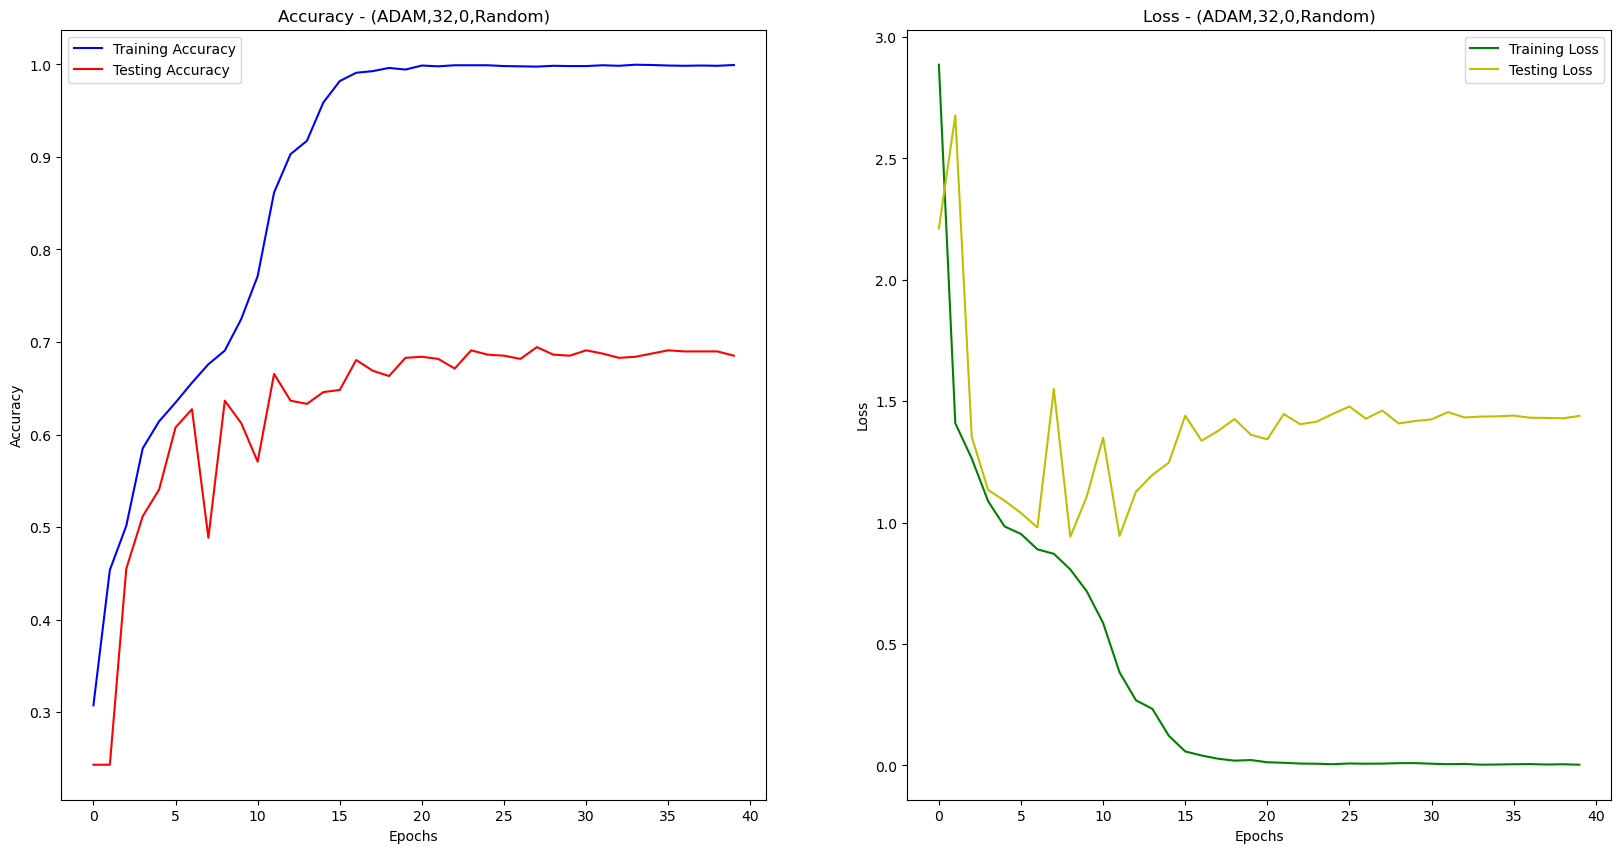

In [ ]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = history_0_batch32.history['accuracy']
train_loss = history_0_batch32.history['loss']
val_acc = history_0_batch32.history['val_accuracy']
val_loss = history_0_batch32.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'b-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'r-' , label = 'Testing Accuracy')
ax[0].set_title('Accuracy - (ADAM,32,0,Random)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-' , label = 'Testing Loss')
ax[1].set_title('Loss - (ADAM,32,0,Random)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


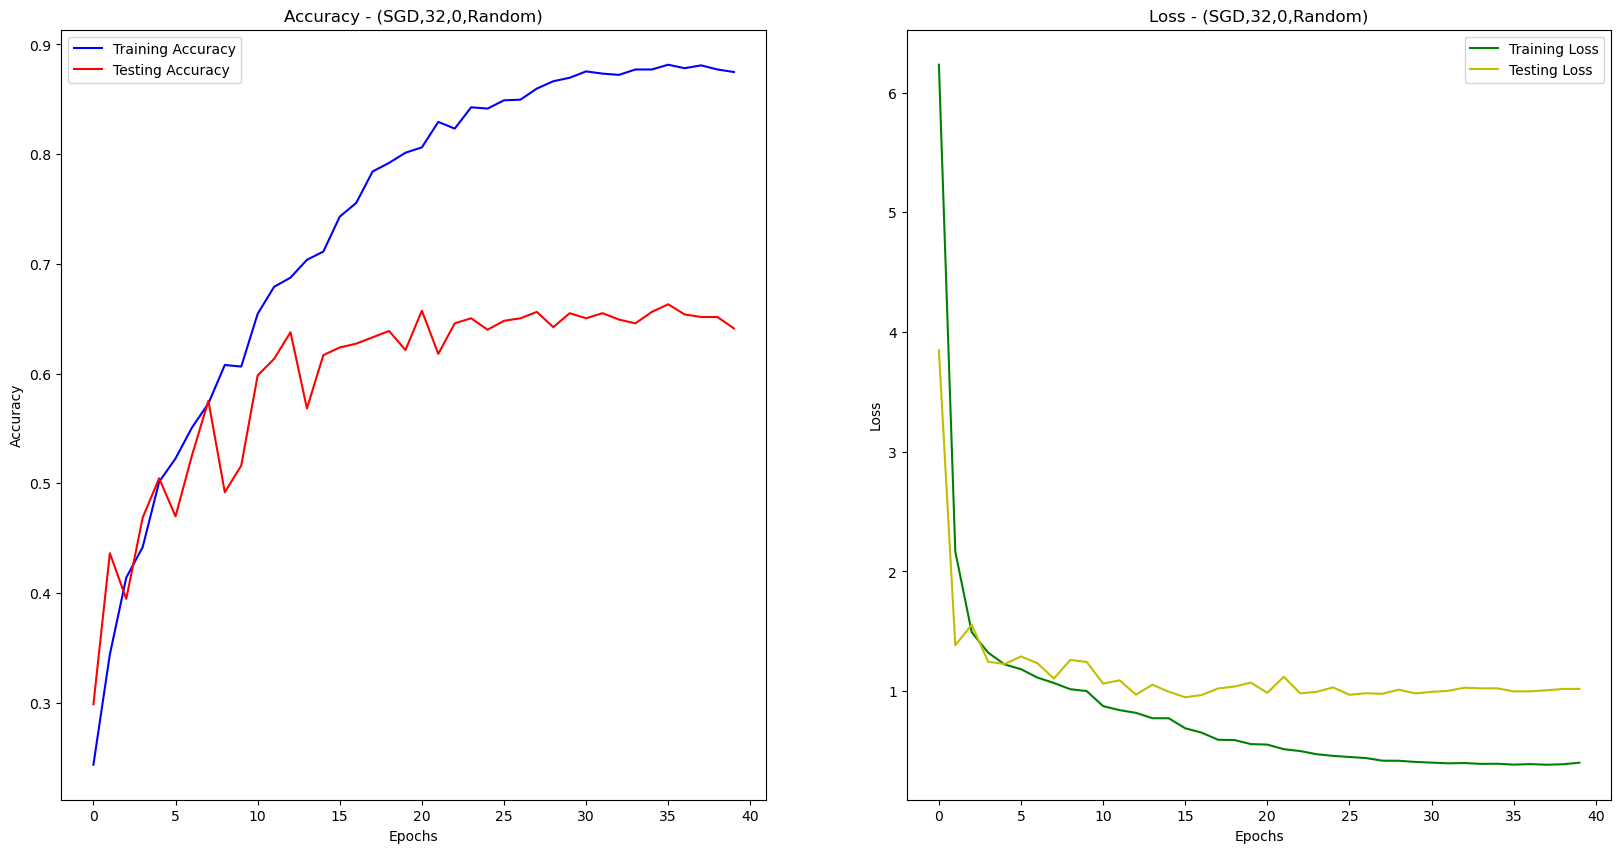

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_1.history['accuracy']
train_loss = history_1.history['loss']
val_acc = history_1.history['val_accuracy']
val_loss = history_1.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'b-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'r-' , label = 'Testing Accuracy')
ax[0].set_title('Accuracy - (SGD,32,0,Random)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-' , label = 'Testing Loss')
ax[1].set_title('Loss - (SGD,32,0,Random)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

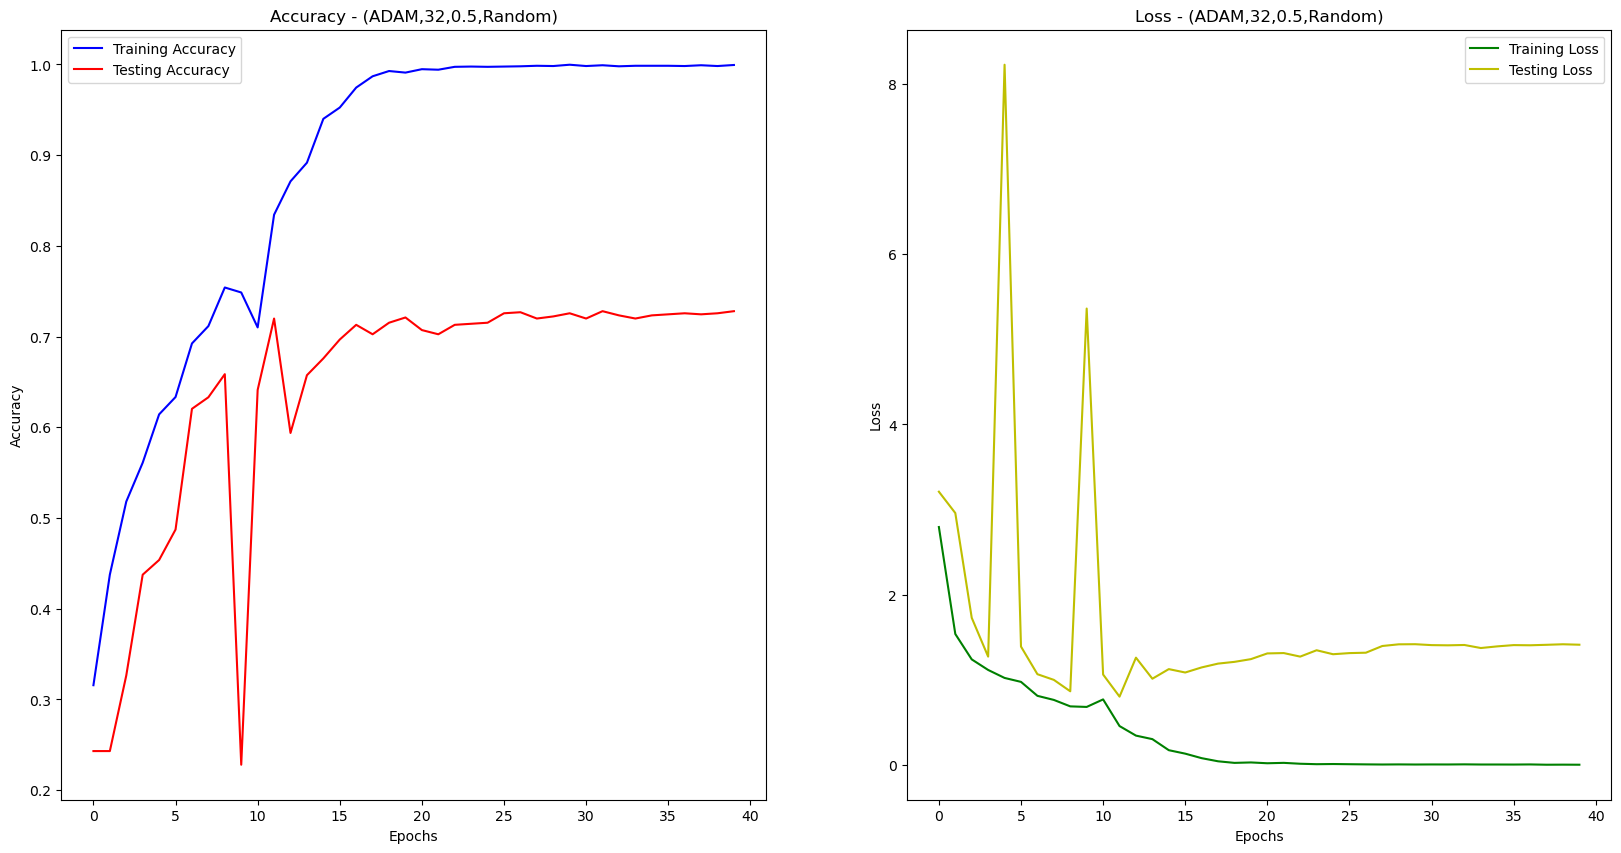

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']
val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'b-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'r-' , label = 'Testing Accuracy')
ax[0].set_title('Accuracy - (ADAM,32,0.5,Random)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-' , label = 'Testing Loss')
ax[1].set_title('Loss - (ADAM,32,0.5,Random)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

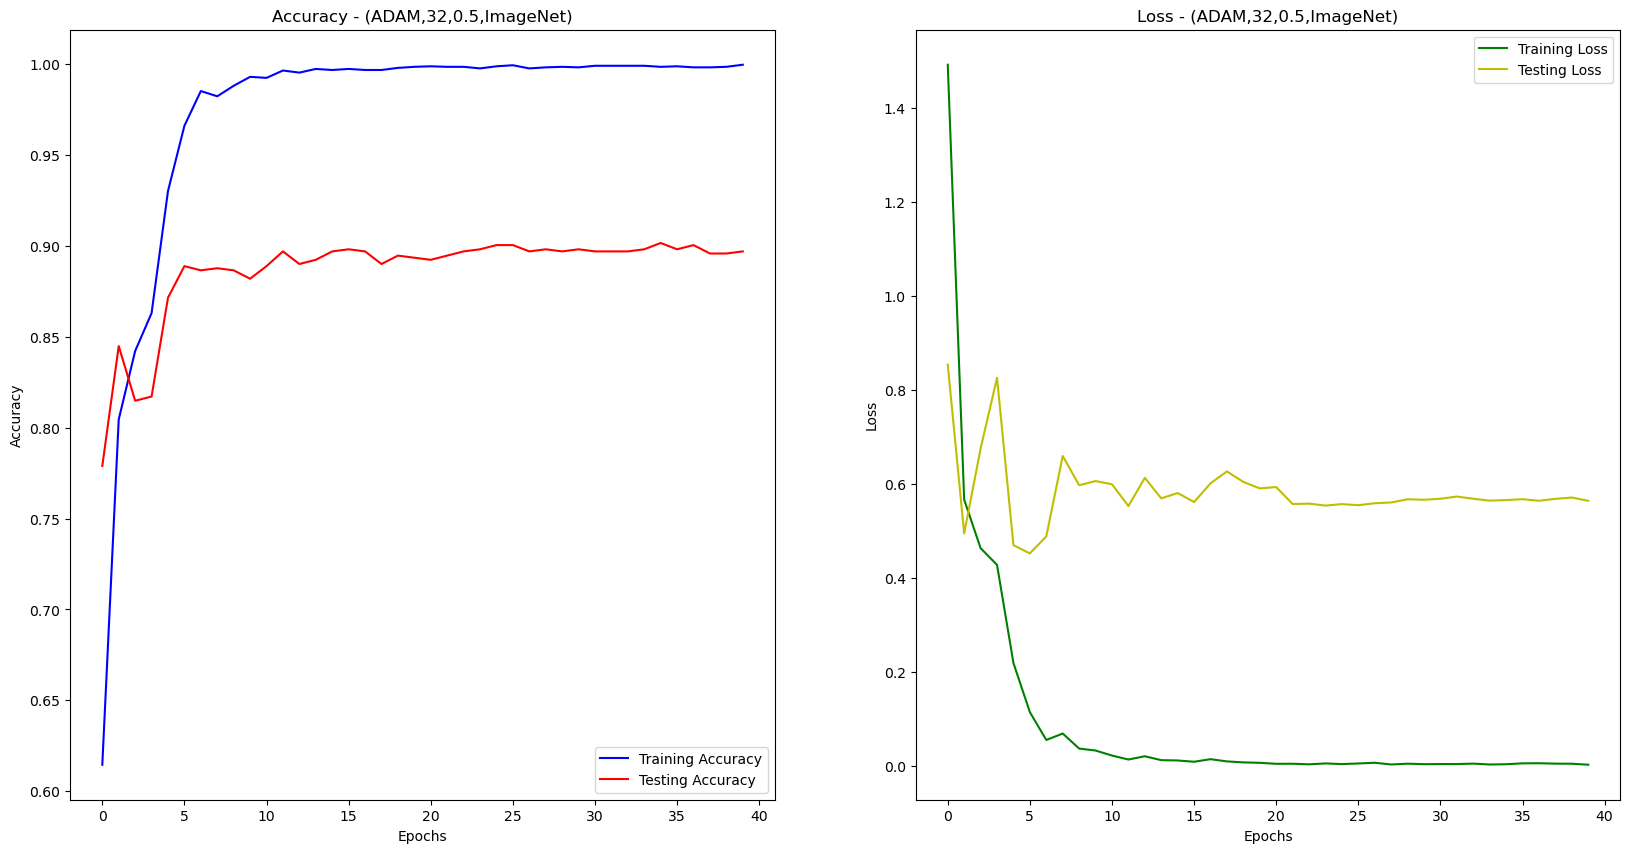

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_3.history['accuracy']
train_loss = history_3.history['loss']
val_acc = history_3.history['val_accuracy']
val_loss = history_3.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'b-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'r-' , label = 'Testing Accuracy')
ax[0].set_title('Accuracy - (ADAM,32,0.5,ImageNet)')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-' , label = 'Testing Loss')
ax[1].set_title('Loss - (ADAM,32,0.5,ImageNet)')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

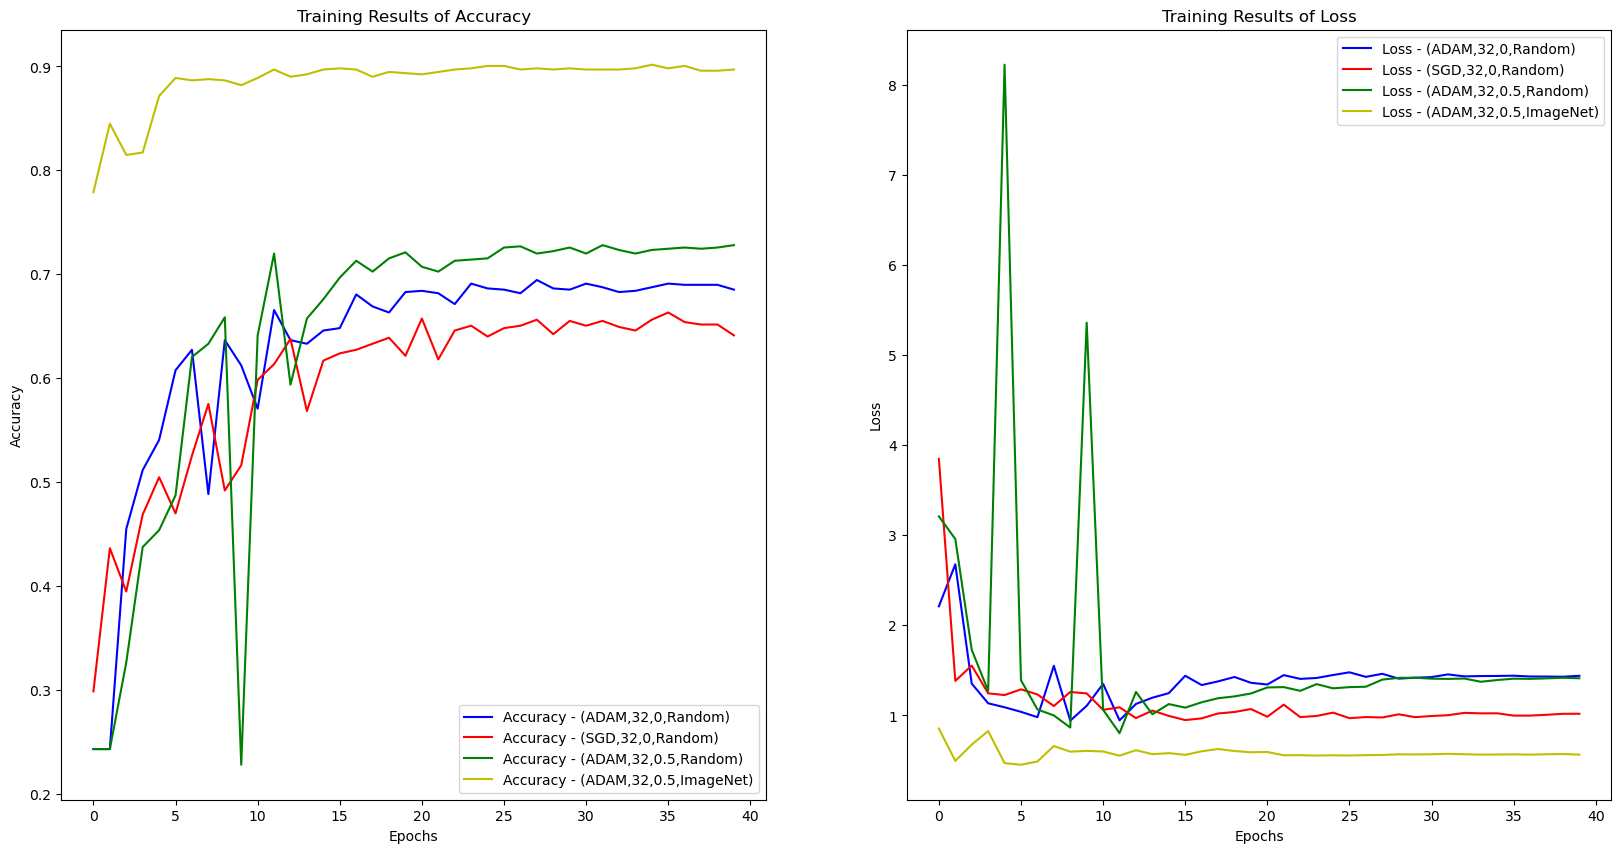

In [ ]:

fig , ax = plt.subplots(1,2)

val_acc_0 = history_0_batch32.history['val_accuracy']
val_acc_1 = history_1.history['val_accuracy']
val_acc_2 = history_2.history['val_accuracy']
val_acc_3 = history_3.history['val_accuracy']

fig.set_size_inches(20,10)

ax[0].plot(epochs , val_acc_0 , 'b-' , label = 'Accuracy - (ADAM,32,0,Random)')
ax[0].plot(epochs , val_acc_1 , 'r-' , label = 'Accuracy - (SGD,32,0,Random)')
ax[0].plot(epochs , val_acc_2 , 'g-' , label = 'Accuracy - (ADAM,32,0.5,Random)')
ax[0].plot(epochs , val_acc_3 , 'y-' , label = 'Accuracy - (ADAM,32,0.5,ImageNet)')
ax[0].set_title('Training Results of Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")


val_loss_0 = history_0_batch32.history['val_loss']
val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

ax[1].plot(epochs , val_loss_0 , 'b-' , label = 'Loss - (ADAM,32,0,Random)')
ax[1].plot(epochs , val_loss_1 , 'r-' , label = 'Loss - (SGD,32,0,Random)')
ax[1].plot(epochs , val_loss_2 , 'g-' , label = 'Loss - (ADAM,32,0.5,Random)')
ax[1].plot(epochs , val_loss_3 , 'y-' , label = 'Loss - (ADAM,32,0.5,ImageNet)')
ax[1].set_title('Training Results of Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
predictions_0 = model_0_batch32.predict(x_test)
predictions_0=np.argmax(predictions_0,axis=1)
y_test_inv_0 = label_binarizer.inverse_transform(y_test)
print(classification_report(y_test_inv_0, predictions_0, target_names = labels))

predictions_1 = model_1.predict(x_test)
predictions_1=np.argmax(predictions_1,axis=1)
y_test_inv_1 = label_binarizer.inverse_transform(y_test)
print(classification_report(y_test_inv_1, predictions_1, target_names = labels))

predictions_2 = model_2.predict(x_test)
predictions_2=np.argmax(predictions_2,axis=1)
y_test_inv_2 = label_binarizer.inverse_transform(y_test)
print(classification_report(y_test_inv_2, predictions_2, target_names = labels))

predictions_3 = model_3.predict(x_test)
predictions_3=np.argmax(predictions_3,axis=1)
y_test_inv_3 = label_binarizer.inverse_transform(y_test)
print(classification_report(y_test_inv_3, predictions_3, target_names = labels))

27/27 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

   dandelion       0.74      0.80      0.77       210
       daisy       0.73      0.72      0.72       153
       tulip       0.65      0.59      0.62       197
   sunflower       0.70      0.76      0.73       147
        rose       0.58      0.54      0.56       157

    accuracy                           0.69       864
   macro avg       0.68      0.68      0.68       864
weighted avg       0.68      0.69      0.68       864

27/27 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

   dandelion       0.63      0.85      0.73       210
       daisy       0.75      0.60      0.67       153
       tulip       0.68      0.44      0.54       197
   sunflower       0.75      0.70      0.72       147
        rose       0.49      0.61      0.55       157

    accuracy                           0.64       864
   macro avg       0.66

<AxesSubplot:>

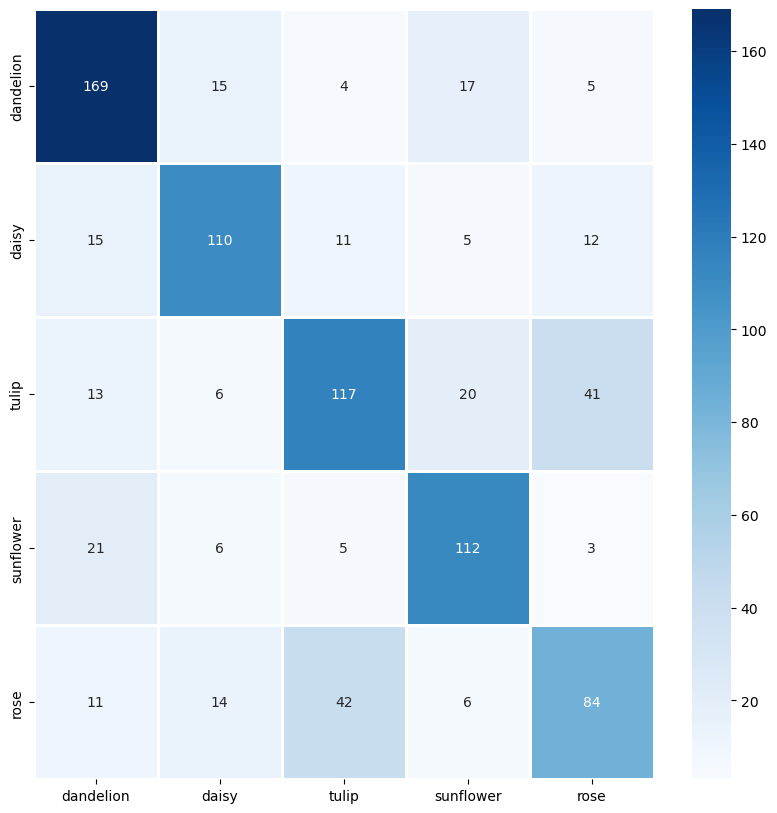

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test_inv,predictions_0) , index = labels , columns = labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'white' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

<AxesSubplot:>

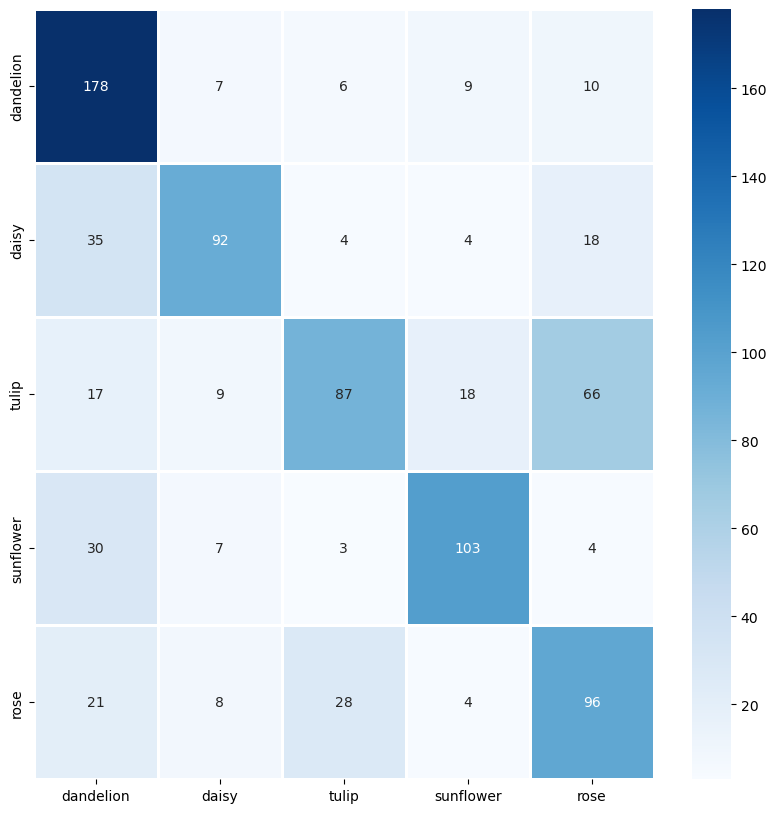

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test_inv,predictions_1) , index = labels , columns = labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'white' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

<AxesSubplot:>

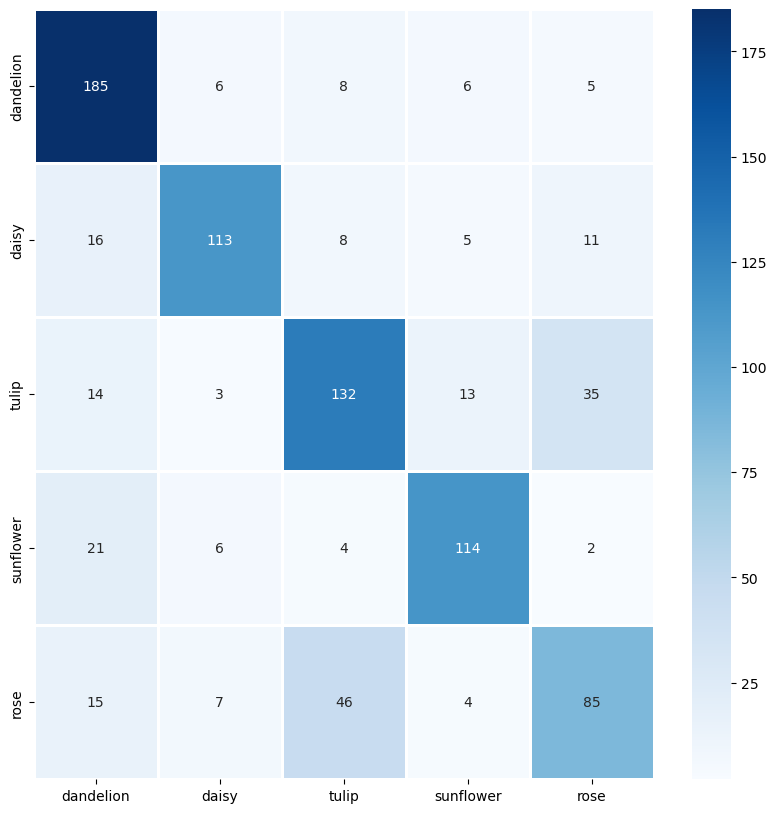

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test_inv,predictions_2) , index = labels , columns = labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'white' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)

<AxesSubplot:>

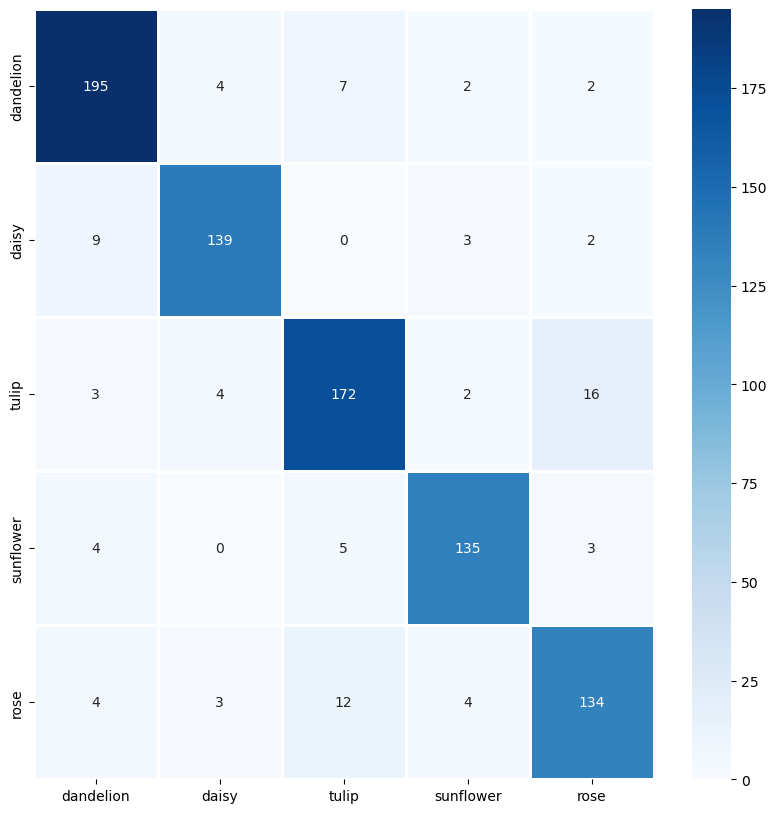

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test_inv,predictions_3) , index = labels , columns = labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'white' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)